In [83]:
import pandas as pd

data = pd.read_csv('../../data/processed/import_declarations_intermax_daily.csv')

data.head()

,Date,Abgabe
0,2017-01-02,439.79
1,2017-01-03,2107.94
2,2017-01-04,215.37
3,2017-01-05,0.00
4,2017-01-06,0.00


In [84]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

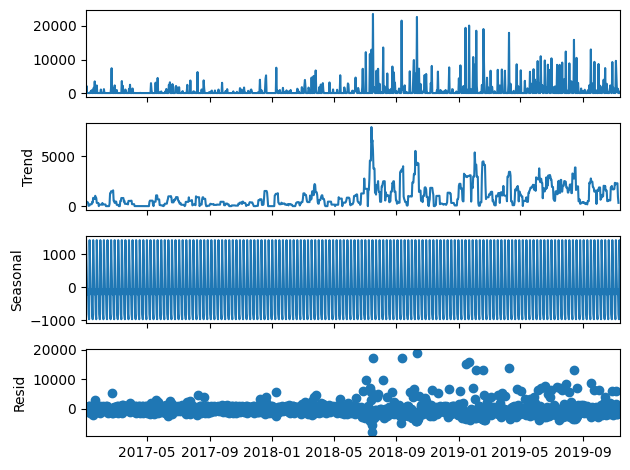

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposed = seasonal_decompose(data) 
decomposed.plot(); plt.show()

In [86]:
from data_preperation import check_stationarity

check_stationarity(data)

'Stationary	 p-value:0.0013140531126810775 	 lags:20


('Stationary', 0.0013140531126810775)

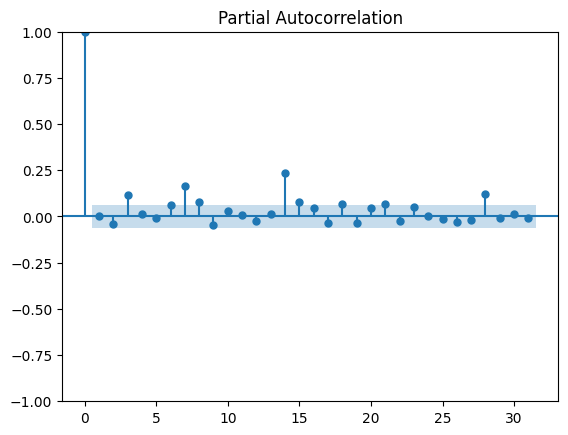

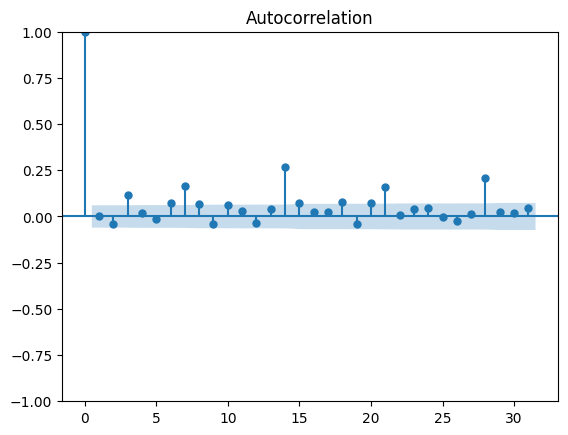

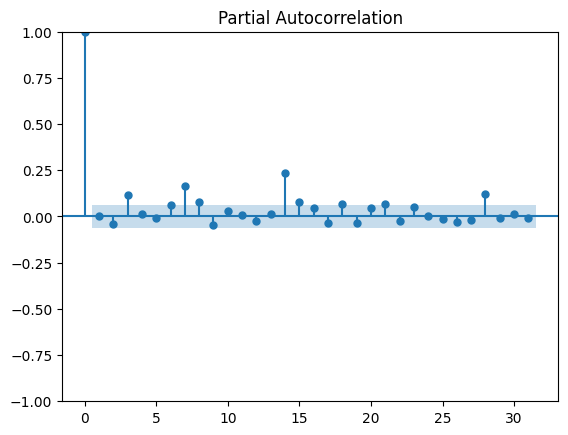

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plot_pacf(data)

In [90]:
from data_preperation import split_data

train, test = split_data(data, test_split=80)

train: 0 , test: 1045


In [97]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(0,1,1))
model_fit = model.fit()

/home/stefaneissler/customsfee_forecasting/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [108]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Abgabe   No. Observations:                 1045
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -9711.710
Date:                Mon, 18 Mar 2024   AIC                          19427.419
Time:                        13:06:12   BIC                          19437.321
Sample:                    01-02-2017   HQIC                         19431.175
                         - 11-12-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9869      0.005   -190.721      0.000      -0.997      -0.977
sigma2      7.019e+06   1.09e+05     64.314      0.000     6.8e+06    7.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.26   Jarque-Bera (JB):             27507.39
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):              14.47   Skew:                             4.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

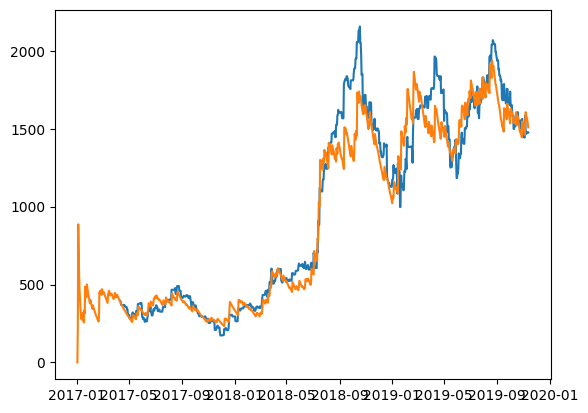

In [114]:
forecast = model_fit.predict(steps=52)

plt.plot(data.Abgabe.rolling(window=100).mean())
plt.plot(forecast)